#### PD Model Monitoring
- A year has passed since I built the Probability of Default (PD), Loss Given Default (LGD) and Exposure at Default (EAD) models, estimated the Expected Loss (EL) of the loans and designed the credit policy. Thus, it is necessary to apply model monitoring.

- **PD Model Monitoring:**
    - Imagine a year has passed since we built our PD model. Although it is very unlikely, the people applying for loans now might be very different from those we used to train our PD model. We need to reassess if our PD model is working well.
    - If the population of the new applicants is too different from the population we used to build the model, the results may be disastrous. In such cases, we need to redevelop the model.
- **Model Maintenance:**
    - The process of assessing the model in light of new data.
    - We do this every six months or every year, for example.
    - We can use the number of applicants as a benchmark. For example, we can redevelop our model after 50,000 or 100,000 new data points.
- **Population Stability Index (PSI):**
    - PSI is used to identify if the characteristics of the new data significantly differ from the original data, potentially indicating the need for model reevaluation or redevelopment. 
    - First population: The original population we used to train our model.
    - Second population: All the new data we get.
    - The idea is to slice a feature (continuous or discrete) into categories (fine classing or coarse classing). Then, assess the distribution of the two population groups across these different categories. The **original** population is called **actual**, while the **new** data is called **expected.**
    - The formula for PSI is defined as: $$ {PSI} = \sum_{i=1}^{k} (\% \text{Expected}_{i} - \% \text{Actual}_{i}) \times \ln\left(\frac{\% \text{Expected}_{i}}{\% \text{Actual}_{i}}\right) $$
        - $ \text{Actual}_{i} $ represents the observed distribution of the variable in question in the original population (the one used to train the model). The subscript $ \text{i} $ indicates that this is specific to a particular category when the variable is sliced into categories (e.g., when performing fine classing or coarse classing).
        - $ \text{Expected}_{i} $ represents the expected distribution of the variable in the new population (the one for which you are assessing stability). Similarly, the subscript $ \text{i} $ indicates that this is specific to the same category.
    - We interpret the PSI values as follows:
        - PSI = 0: No difference between the actual (original data) and expected (new data) populations.
        - PSI < 0.1: Little to no difference between the actual (original data) and expected (new data) populations.
        - 0.1 < PSI < 0.25: There is a slight difference between the actual (original data) and expected (new data) populations. No action is taken.
        - PSI ≥ 0.25: There is a substantial difference between the actual (original data) and expected (new data) populations. Action is taken.
        - PSI = 1: Absolute difference between the actual (original data) and expected (new data) populations. 

- Taking into account all the information discussed above, **I will now load new data**, specifically **loans from 2015 onward**, and **compare** it with the **original data.** This comparison, akin to the **PSI calculation**, involves assessing the actual (original data) versus expected (new data) populations, comparing their **distributions across categories** of each independent and dependent variable. If the **PSI** indicates a **significant difference** between these **populations**, suggesting a shift in applicant characteristics, it will signal the **need** to **redevelop the PD Model.**

#### 5.0 Import the libraries

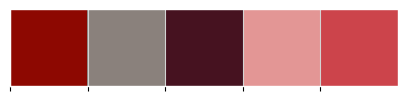

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling.
from sklearn.pipeline import Pipeline

# Utils.
from src.eda_utils import *
from src.modelling_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 5.2 Collect the Data
- The PD Model was trained on loan data from 2007 to 2014. Now, one year has passed, and we will acquire loan data from 2015. With this new applicant data, we will investigate whether the distribution in the monitoring period (2015 loans, expected) significantly differs from the reference distribution (training data, actual) using the PSI, as mentioned above.

In [2]:
monitoring_data_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/large_files/loan_data_2015.csv'
clean_reference_data_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/input/clean_loan_data.parquet'
monitoring_data = pd.read_csv(monitoring_data_path)
clean_reference_data = pd.read_parquet(clean_reference_data_path)

In [3]:
monitoring_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [4]:
# Sorting the df by id, obtaining loan data over time.
monitoring_data = monitoring_data.sort_values(by='id', ascending=True).reset_index(drop=True)

In [5]:
# General information.
monitoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   member_id                    int64  
 2   loan_amnt                    int64  
 3   funded_amnt                  int64  
 4   funded_amnt_inv              float64
 5   term                         object 
 6   int_rate                     float64
 7   installment                  float64
 8   grade                        object 
 9   sub_grade                    object 
 10  emp_title                    object 
 11  emp_length                   object 
 12  home_ownership               object 
 13  annual_inc                   float64
 14  verification_status          object 
 15  issue_d                      object 
 16  loan_status                  object 
 17  pymnt_plan                   object 
 18  url                          object 
 19  de

In [6]:
print(f'The dataset has {monitoring_data.shape[0]} rows and {monitoring_data.shape[1]} columns.')

The dataset has 421094 rows and 74 columns.


In [7]:
# Missing records.
missing_df = monitoring_data.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / monitoring_data.shape[0] * 100, 3)
missing_df.head(28)

,count,pct
desc,421049,99.989
dti_joint,420585,99.879
annual_inc_joint,420583,99.879
verification_status_joint,420583,99.879
il_util,402477,95.579
mths_since_rcnt_il,400284,95.058
inq_last_12m,399722,94.925
total_bal_il,399722,94.925
open_acc_6m,399722,94.925
open_il_6m,399722,94.925


In [8]:
# Duplicates.
monitoring_data.duplicated().sum()

0

#### 5.3 Clean the Data
- The **same data cleaning procedures** that were applied to the 2007-2014 loan data will be carried out. To ensure comparability, we must apply the same preprocessing steps to the expected data as were applied to the actual data.
- I will not provide an explanation of the code I am working on here because it is already included in the data cleaning notebook.

In [9]:
# Creating a copy to saveguard the original data.
clean_monitoring_data = monitoring_data.copy()

In [10]:
# Remove irrelevant variables.
to_drop_missing = missing_df.loc[missing_df['pct'] >= 70].index.tolist()
to_drop_leakage = ['funded_amnt', 'installment', 'revol_util', 
                    'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt']
to_drop_irrelevant = ['id', 'member_id', 'url', 'next_pymnt_d', 
                      'application_type', 'pymnt_plan', 'issue_d',
                      'policy_code', 'zip_code', 'title',
                      'emp_title', 'last_pymnt_d', 'last_credit_pull_d',
                      'funded_amnt_inv', 'total_pymnt_inv', 'out_prncp_inv',
                      'delinq_2yrs', 'acc_now_delinq', 'pub_rec', 'total_rev_hi_lim', 
                      ]
to_drop_loans_2007_2014 = ['delinq_2yrs', 'acc_now_delinq', 'pub_rec', 'total_rev_hi_lim', 
                       'recovery_rate', 'credit_conversion_factor', 'loan_status', 'issue_d']
to_drop = to_drop_missing + to_drop_irrelevant + to_drop_leakage
clean_monitoring_data = clean_monitoring_data.drop(columns=to_drop)
clean_reference_data = clean_reference_data.drop(columns=to_drop_loans_2007_2014 + to_drop_leakage)
clean_monitoring_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc', 'initial_list_status', 'tot_cur_bal'], dtype='object')

In [11]:
# Treat missing values.
to_drop_missings = ['annual_inc', 'total_acc', 'open_acc', 'inq_last_6mths', 'earliest_cr_line']
clean_monitoring_data = clean_monitoring_data.dropna(subset=to_drop_missings)
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].fillna('0 years')

In [12]:
# Convert term variable to int format.
clean_monitoring_data['term'] = clean_monitoring_data['term'].apply(lambda x: int(x[1:3]))
print(clean_monitoring_data['term'].unique(), clean_monitoring_data.term.dtype)

# Convert emp_length to float format because of the missing values.
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].str.replace('+', '')
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].str.replace('< 1 year', '0')
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].str.replace(' years', '')
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].str.replace(' year', '')
clean_monitoring_data['emp_length'] = clean_monitoring_data['emp_length'].astype('int')
print(clean_monitoring_data['emp_length'].unique())

# Convert earlist_cr_line to datetime format.
clean_monitoring_data['earliest_cr_line'] = pd.to_datetime(clean_monitoring_data['earliest_cr_line'], format='%b-%y')

# Extract new features
CURR_DATE = pd.to_datetime('2017-12-01')

# Extract mths_since_earliest_cr_line variable.
clean_monitoring_data['mths_since_earliest_cr_line'] = round((CURR_DATE - clean_monitoring_data['earliest_cr_line']) / np.timedelta64(1, 'M'))
clean_monitoring_data = clean_monitoring_data.drop(columns=['earliest_cr_line'])

# Extract the target variable for the PD Model, default.
clean_monitoring_data['default'] = np.where(clean_monitoring_data['loan_status'].isin(['Charged Off', 
                                                             'Late (31-120 days)',
                                                             'Does not meet the credit policy. Status:Charged Off', 
                                                             'Default']), 0, 1)
clean_monitoring_data = clean_monitoring_data.drop(columns=['loan_status'])
print(clean_monitoring_data['default'].value_counts(normalize=True))

max_mths_since_earliest_cr_line = clean_monitoring_data['mths_since_earliest_cr_line'].max()
clean_monitoring_data.loc[clean_monitoring_data['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = max_mths_since_earliest_cr_line

[36 60] int64
[10  5  2  8  3  6  0  7  4  1  9]
default
1    0.981356
0    0.018644
Name: proportion, dtype: float64


In [13]:
# Defining which columns will be converted to the respective lower momery consumption data types lists.
to_float32 = ['annual_inc', 'dti', 'int_rate', 
              'tot_cur_bal', 'mths_since_last_delinq'
              ]
to_int8 = ['default', 'term']
to_int16 = ['inq_last_6mths', 'open_acc', 'total_acc',
            'emp_length', 'mths_since_earliest_cr_line']
to_int32 = ['loan_amnt']
to_int64 = ['revol_bal']
to_category = clean_monitoring_data.select_dtypes('object').columns.tolist()

# Optimizing memory.
clean_monitoring_data[to_float32] = clean_monitoring_data[to_float32].astype('float32')
clean_monitoring_data[to_int8] = clean_monitoring_data[to_int8].astype('int8')
clean_monitoring_data[to_int16] = clean_monitoring_data[to_int16].astype('int16')
clean_monitoring_data[to_int32] = clean_monitoring_data[to_int32].astype('int32')
clean_monitoring_data[to_int64] = clean_monitoring_data[to_int64].astype('int64')
clean_monitoring_data[to_category] = clean_monitoring_data[to_category].astype('category')
clean_monitoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 21 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   loan_amnt                    int32   
 1   term                         int8    
 2   int_rate                     float32 
 3   grade                        category
 4   sub_grade                    category
 5   emp_length                   int16   
 6   home_ownership               category
 7   annual_inc                   float32 
 8   verification_status          category
 9   purpose                      category
 10  addr_state                   category
 11  dti                          float32 
 12  inq_last_6mths               int16   
 13  mths_since_last_delinq       float32 
 14  open_acc                     int16   
 15  revol_bal                    int64   
 16  total_acc                    int16   
 17  initial_list_status          category
 18  tot_cur_bal             

#### 5.4 Preprocess Data
- I will apply the **same preprocessing** that was applied to the PD Model training data to the monitoring 2015 loan data. This involves extracting **dummy variables** from categorical variables, discretizing continuous variables and bundling categories based on WoE and balancing by the number of observations. I will also retain the same reference categories for each original independent variable, those with the highest credit risk/lowest WoE.
- An important observation is that, to implement model monitoring, it is not necessary to obtain separate train and test sets; only the separation of predictor and target data is required.
- I will also load and preprocess again the training data from the constructed PD Model. This is necessary because unfortunately, I did not save the training preprocessed data due to GitHub's large files issues. Thus, I will obtain it below.
- Although there might be absent categories in the monitoring data, our preprocessor already deals with it, constructing a dummy with zeros for that category. This is a robust preprocessor and allows us to easily assess de PSI further.

In [14]:
# Obtain predictor and target variables data.
X_monitoring = clean_monitoring_data.drop(columns=['default'])
y_monitoring = clean_monitoring_data['default'].copy()
X_monitoring.shape, y_monitoring.shape

((421094, 20), (421094,))

In [69]:
# Obtain original training data used to train the PD Model and separate it into predictor and target data.
train, test = np.split(clean_reference_data, [int(.80 * len(clean_reference_data))])
X_train = train.drop(columns=['default'])
y_train = train['default'].copy()
X_train.shape, y_train.shape

((373004, 20), (373004,))

In [70]:
# Preprocess the train and monitoring sets.

# Construct a pipeline.
pipe = Pipeline(
    steps=[
        ('discretizer_combiner', DiscretizerCombiner()),
        ('cat_combiner', CatCombiner()),
        ('cat_imputer', CatImputer()),
        ('cat_one_hot_encoder', CatOneHotEncoder())
    ]
) 

X_train_prepared = pipe.fit_transform(X_train)
X_monitoring_prepared = pipe.transform(X_monitoring)
X_monitoring_prepared.head()

,loan_amnt_14.3K-21.2K,loan_amnt_21.2K-28.1K,loan_amnt_7.4K-14.3K,loan_amnt_<=7.4K,term_36,int_rate_10.0-12.0,int_rate_12.0-14.0,int_rate_14.0-16.0,int_rate_16.0-18.0,int_rate_18.0-22.0,int_rate_7.0-10.0,int_rate_<=7.0,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,sub_grade_A3_A2_A1,sub_grade_A5_A4,sub_grade_B2_B1,sub_grade_B4_B3,sub_grade_C2_C1_B5,sub_grade_C5_C4_C3,sub_grade_D3_D2_D1,sub_grade_E1_D5_D4,sub_grade_E5_F1_E4_E3_E2,emp_length_1-3,emp_length_10,emp_length_4-6,emp_length_7-9,home_ownership_MORTGAGE,home_ownership_OWN,annual_inc_120.0K-150.0K,annual_inc_20.0K-40.0K,annual_inc_40.0K-60.0K,annual_inc_60.0K-75.0K,annual_inc_75.0K-90.0K,annual_inc_90.0K-120.0K,annual_inc_>150.0K,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_other_house_medical_vacation,purpose_wedding_home_improvement_major_purchase_car,addr_state_AL_NM_NJ,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,addr_state_CA,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,addr_state_NY,addr_state_OK_MO_MD_NC,addr_state_TX,dti_12.0-16.0,dti_16.0-20.0,dti_20.0-28.0,dti_4.0-8.0,dti_8.0-12.0,dti_<=4.0,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,mths_since_last_delinq_22.0-37.0,mths_since_last_delinq_37.0-74.0,mths_since_last_delinq_4.0-7.0,mths_since_last_delinq_7.0-22.0,mths_since_last_delinq_>74.0,mths_since_last_delinq_never_delinquent,open_acc_12.0-21.0,open_acc_6.0-12.0,open_acc_>21.0,revol_bal_12.0K-22.0K,revol_bal_2.0K-6.0K,revol_bal_22.0K-30.0K,revol_bal_30.0K-36.0K,revol_bal_36.0K-40.0K,revol_bal_6.0K-12.0K,revol_bal_>40.0K,total_acc_15.0-24.0,total_acc_24.0-36.0,total_acc_8.0-15.0,total_acc_>36.0,initial_list_status_w,tot_cur_bal_140.0K-200.0K,tot_cur_bal_200.0K-240.0K,tot_cur_bal_240.0K-280.0K,tot_cur_bal_280.0K-340.0K,tot_cur_bal_340.0K-400.0K,tot_cur_bal_80.0K-140.0K,tot_cur_bal_<=80.0K,tot_cur_bal_>400.0K,mths_since_earliest_cr_line_151.0-226.0,mths_since_earliest_cr_line_226.0-276.0,mths_since_earliest_cr_line_276.0-401.0,mths_since_earliest_cr_line_>401.0
0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [71]:
# Obtain the reference categories for further removal.
one_hot_encoder_reference_categories = pipe.named_steps['cat_one_hot_encoder'].reference_categories
referece_categories = dict(zip(X_train.columns, one_hot_encoder_reference_categories))

# Post PD estimation variable dropping.

# Remove all grade dummies (including grade_G), total accounts dummies and term_36 dummy.
grade_dummies = ['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F']
total_acc_dummies = ['total_acc_8.0-15.0', 'total_acc_15.0-24.0', 'total_acc_24.0-36.0', 'total_acc_>36.0']
term_dummy = ['term_36']
to_drop = grade_dummies + total_acc_dummies + term_dummy

# Remove the statistically non-significant variables reference categories.
non_significant_variables = ['grade', 'total_acc', 'term']
for variable in non_significant_variables:
    referece_categories.pop(variable, None)


# Drop columns.
X_train_prepared = X_train_prepared.drop(columns=to_drop)
X_monitoring_prepared = X_monitoring_prepared.drop(columns=to_drop)
X_train_prepared.shape, X_monitoring_prepared.shape

((373004, 86), (421094, 86))

- Perfect! Both training and monitoring data are preprocessed with exactly the same dummies and we are ready to compute the scores by re-fitting and predicting with PD Model and finally assess the Population Stability Index (PSI).

#### 5.5 Obtain Scores
- I will load the **scorecard** constructed after the PD Model and use it to **compute credit scores on the monitoring data.** The training data credit scores are already saved in the PD Model's artifacts, and I will just load it. This is necessary because we not only intend to assess the **Population Stability Index (PSI)** for the **independent variables but also for the credit scores.** In fact, credit score stability is crucial to investigate. If they differ significantly, it indicates a change in market applicants' characteristics, and a new PD Model must be developed.

In [72]:
# Obtain the scorecard and training credit scores.
scorecard_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/artifacts/pd_model/scorecard.csv'
train_scores_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/artifacts/pd_model/train_scores.parquet'
scorecard = pd.read_csv(scorecard_path).drop(columns=['Unnamed: 0'])
train_scores = pd.read_parquet(train_scores_path)
scorecard

,Dummy,Beta Coefficient,P-Value,Wald Statistic,Score
0,addr_state_AL_NM_NJ,0.056677,0.03363813467106878,4.513002911206301,5.0
1,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,0.149906,4.922408641046277e-14,56.760558272715116,12.0
2,addr_state_CA,0.088336,2.8297950205991425e-05,17.528860205657644,7.0
3,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,0.227078,6.90518811997335e-28,119.82623762120899,18.0
4,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,0.390709,3.2906047212629245e-46,203.67786178361803,32.0
5,addr_state_NE_IA_NV_HI_FL,0.000000,reference category,reference category,0.0
6,addr_state_NY,0.090361,0.00015628487985864837,14.294934463876208,7.0
7,addr_state_OK_MO_MD_NC,0.099432,5.754031091906685e-05,16.181932595296786,8.0
8,addr_state_TX,0.275195,1.0443460145851565e-26,114.43890897320092,22.0
9,annual_inc_120.0K-150.0K,0.853251,4.3220837812782054e-66,294.86891726660775,69.0


In [73]:
# Compute credit scores of the monitoring data.
# Just pass anything in probas.
monitoring_scores = compute_credit_scores(X_monitoring_prepared, y_monitoring, 0, scorecard)

# Concatenate the training and monitoring credit scores to the respective prepared data.
X_train_prepared = pd.concat([X_train_prepared, train_scores['Score']], axis=1)
X_monitoring_prepared = pd.concat([X_monitoring_prepared, monitoring_scores['Score']], axis=1)

X_monitoring_prepared.head()

,loan_amnt_14.3K-21.2K,loan_amnt_21.2K-28.1K,loan_amnt_7.4K-14.3K,loan_amnt_<=7.4K,int_rate_10.0-12.0,int_rate_12.0-14.0,int_rate_14.0-16.0,int_rate_16.0-18.0,int_rate_18.0-22.0,int_rate_7.0-10.0,int_rate_<=7.0,sub_grade_A3_A2_A1,sub_grade_A5_A4,sub_grade_B2_B1,sub_grade_B4_B3,sub_grade_C2_C1_B5,sub_grade_C5_C4_C3,sub_grade_D3_D2_D1,sub_grade_E1_D5_D4,sub_grade_E5_F1_E4_E3_E2,emp_length_1-3,emp_length_10,emp_length_4-6,emp_length_7-9,home_ownership_MORTGAGE,home_ownership_OWN,annual_inc_120.0K-150.0K,annual_inc_20.0K-40.0K,annual_inc_40.0K-60.0K,annual_inc_60.0K-75.0K,annual_inc_75.0K-90.0K,annual_inc_90.0K-120.0K,annual_inc_>150.0K,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_other_house_medical_vacation,purpose_wedding_home_improvement_major_purchase_car,addr_state_AL_NM_NJ,addr_state_AR_TN_MI_UT_VA_LA_PA_AZ_OH_RI_KY_DE_IN,addr_state_CA,addr_state_MA_SD_GA_MN_WI_WA_OR_IL_CT,addr_state_MS_MT_SC_VT_KS_CO_AK_NH_WV_WY_ID_DC_ME,addr_state_NY,addr_state_OK_MO_MD_NC,addr_state_TX,dti_12.0-16.0,dti_16.0-20.0,dti_20.0-28.0,dti_4.0-8.0,dti_8.0-12.0,dti_<=4.0,inq_last_6mths_0,inq_last_6mths_1,inq_last_6mths_2,inq_last_6mths_3,mths_since_last_delinq_22.0-37.0,mths_since_last_delinq_37.0-74.0,mths_since_last_delinq_4.0-7.0,mths_since_last_delinq_7.0-22.0,mths_since_last_delinq_>74.0,mths_since_last_delinq_never_delinquent,open_acc_12.0-21.0,open_acc_6.0-12.0,open_acc_>21.0,revol_bal_12.0K-22.0K,revol_bal_2.0K-6.0K,revol_bal_22.0K-30.0K,revol_bal_30.0K-36.0K,revol_bal_36.0K-40.0K,revol_bal_6.0K-12.0K,revol_bal_>40.0K,initial_list_status_w,tot_cur_bal_140.0K-200.0K,tot_cur_bal_200.0K-240.0K,tot_cur_bal_240.0K-280.0K,tot_cur_bal_280.0K-340.0K,tot_cur_bal_340.0K-400.0K,tot_cur_bal_80.0K-140.0K,tot_cur_bal_<=80.0K,tot_cur_bal_>400.0K,mths_since_earliest_cr_line_151.0-226.0,mths_since_earliest_cr_line_226.0-276.0,mths_since_earliest_cr_line_276.0-401.0,mths_since_earliest_cr_line_>401.0,Score
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,626.0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,727.0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,682.0
3,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,758.0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,565.0


- Considering that we calculate PSI with categorical dummy variables, we will have to convert scores into dummy variables as well. I will divide the training credit scores into 11 categories (from 50 in 50), creating these dummies, and construct the same dummies for the monitorign data, comparing the two distributions.

In [74]:
# Define score ranges, 50 in 50 starting from 300 and finishing in 850.
score_ranges = list(range(300, 860, 50))
labels = [f'{start}_{start+50}' for start in range(300, 850, 50)] 
X_train_prepared['score_range'] = pd.cut(X_train_prepared['Score'], bins=score_ranges, labels=labels, right=False)
X_monitoring_prepared['score_range'] = pd.cut(X_monitoring_prepared['Score'], bins=score_ranges, labels=labels, right=False)

# Obtain the dummies in training and monitoring data.
train_score_dummies = pd.get_dummies(X_train_prepared['score_range'], prefix='score', dtype=int)
monitoring_score_dummies = pd.get_dummies(X_monitoring_prepared['score_range'], prefix='score', dtype=int)

X_train_prepared = pd.concat([X_train_prepared, train_score_dummies], axis=1)
X_monitoring_prepared = pd.concat([X_monitoring_prepared, monitoring_score_dummies], axis=1)

X_train_prepared = X_train_prepared.drop(['Score', 'score_range'], axis=1)
X_monitoring_prepared = X_monitoring_prepared.drop(['Score', 'score_range'], axis=1)

#### 5.6 Population Stability Index Calculation and Interpretation
- The formula for PSI is defined as: 
$$ {PSI} = \sum_{i=1}^{k} (\% \text{Expected}_{i} - \% \text{Actual}_{i}) \times \ln\left(\frac{\% \text{Expected}_{i}}{\% \text{Actual}_{i}}\right) $$
- $ \text{Actual}_{i} $ represents the observed distribution of the variable in question in the original population (the one used to train the model). The subscript $ \text{i} $ indicates that this is specific to a particular category when the variable is sliced into categories (e.g., when performing fine classing or coarse classing).
- $ \text{Expected}_{i} $ represents the expected distribution of the variable in the new population (the one for which you are assessing stability). Similarly, the subscript $ \text{i} $ indicates that this is specific to the same category.

- We interpret the PSI values as follows:
    - PSI = 0: No difference between the actual (original data) and expected (new data) populations.
    - PSI < 0.1: Little to no difference between the actual (original data) and expected (new data) populations.
    - 0.1 < PSI < 0.25: There is a slight difference between the actual (original data) and expected (new data) populations. No action is taken.
    - PSI ≥ 0.25: There is a substantial difference between the actual (original data) and expected (new data) populations. Action is taken.
    - PSI = 1: Absolute difference between the actual (original data) and expected (new data) populations. 

In [93]:
# Calculate PSI on training and monitoring data.
calculated_PSI, PSI_train_monitoring = compute_PSI(X_train_prepared, X_monitoring_prepared)
PSI_train_monitoring.head()

,Dummy,Train Proportion,Monitoring Proportion,Original Variable,Dummy PSI
0,loan_amnt_14.3K-21.2K,0.254032,0.266705,loan_amnt,0.000617
1,loan_amnt_21.2K-28.1K,0.109272,0.129418,loan_amnt,0.003409
2,loan_amnt_7.4K-14.3K,0.338806,0.316435,loan_amnt,0.001528
3,loan_amnt_<=7.4K,0.225544,0.195303,loan_amnt,0.004354
4,int_rate_10.0-12.0,0.138489,0.127805,int_rate,0.000858


In [92]:
calculated_PSI

,Variable PSI
Original Variable,
initial_list_status,0.248342
score,0.190125
int_rate,0.161465
inq_last_6mths,0.063366
verification_status,0.050942
tot_cur_bal,0.041253
open_acc,0.026804
dti,0.020201
mths_since_last_delinq,0.016594


PSI Interpretation:
- Observing the score, we notice a significant PSI. Although it is not greater than 0.25, given the importance of PSI for scores, it is recommended to build another PD Model in the near future. There is a difference between the two populations concerning the outcomes obtained by the model. This is the most serious population change we can observe, as it implies that our model outputs are considerably different from those before. 
- 'initial_list_status' presents the highest PSI, practically equal to 0.25, indicating a substantial difference between the actual (training data) and expected (monitoring data) population distributions in this variable. However, it is noticeable that in the monitoring data, the 'w' category had its proportion doubled. Although it has the highest and considerable PSI, this change reflects a shift in the bank's strategy rather than the characteristics of the borrowers.
- 'int_rate' also presents a significant PSI, indicating a slight difference between the actual (training data) and expected (monitoring data) population distributions in this variable. However, since it is a slight difference, no action is taken because of it.
- For the other independent variables, the PSI does not indicate a significant change in the applicants' characteristics, maintaining similar distributions.

#### 5.7 Conclusion
-  In this notebook, we applied **model monitoring to our PD Model one year after its construction, using the 2015 loan data**. Model monitoring aims to observe whether applicants' characteristics remain consistent over time. The fundamental assumption in credit risk models is that future data will resemble past data. If the population changes significantly, it may be necessary to retrain the model. To assess **differences between the actual (training data) and expected (monitoring data)**, the **Population Stability Index (PSI)** was calculated for **each variable.**
- Initial list status exhibited the highest PSI, nearly equal to 0.25, indicating a substantial change in the applicants' population. However, this change is more likely due to shifts in the bank's strategies than changes in the borrowers' characteristics.
- On the other hand, **credit scores showed a PSI of 0.19, close to 0.25.** This suggests that we **may need to construct another PD Model in the near future.** This represents a significant population change, implying that **our model outputs are considerably different from those observed previously.**